In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

In [6]:
# Загружаем датасет с автомобилями
df = pd.read_csv('Grisha_car1.csv', delimiter=',')


In [7]:
# Чистим данные
#
df = df.astype(str)
# удаление строк
df = df[~df.apply(lambda x: x.str.contains('Unknown')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('< 1')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('42,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('100,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('160,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('250,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('110,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('90,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('166,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('140,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('197,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('270,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('автомат')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('15,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('95,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('300,')).any(axis=1)]
df = df[~df.apply(lambda x: x.str.contains('51,')).any(axis=1)]

In [3]:
df

,Unnamed: 0,name_car,price,year,engine,power,type_engine,type_transmition,type_of_drive,mileage
0,0,Nissan Note,845000,2018,1.2,79,бензин,вариатор,4WD,75
1,1,BMW X6,7470000,2020,3.0,249,дизель,АКПП,4WD,89
2,2,Suzuki Escudo,1690000,2018,1.4,136,бензин,АКПП,4WD,58
3,3,Lexus RX200t,3200000,2015,2.0,238,бензин,АКПП,4WD,71
4,4,Honda Vezel,1565000,2018,1.5,132,гибрид,робот,передний,80
...,...,...,...,...,...,...,...,...,...,...
11975,11975,Lexus CT200h,1230000,2011,1.8,99,гибрид,вариатор,передний,124
11976,11976,Nissan Leaf,400000,2014,"109 .с.,",Unknown,электро,АКПП,передний,148
11977,11977,Unknown,650000,Unknown,1.3,88,гибрид,вариатор,передний,170
11978,11978,Subaru Forester,1200000,2014,2.0,150,бензин,вариатор,4WD,199


In [8]:
# убираем модель и оставляем только марку
df['name_car'] = df['name_car'].str.split(' ').str[0]

In [9]:
def convert_mileage(val):
    val = val.replace(' тыс. км', '') # удалить " тыс. км"
    return int(val) * 1000 # умножить на 1000 и вернуть результат

# применить функцию к столбцу "mileage"
df['mileage'] = df['mileage'].apply(convert_mileage)

In [10]:
# преобразовать столбцы в нужный тип данных
df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)
df['power'] = df['power'].astype(int)
df['mileage'] = df['mileage'].astype(int)

# заменить запятые на точки в столбце "engine"
df['engine'] = df['engine'].replace(',', '.', regex=True).astype(float)

In [11]:
df.rename(columns={df.columns[0]: 'Id'}, inplace=True)
df['Id'] = df['Id'].astype(int)

In [12]:
df

,Id,name_car,price,year,engine,power,type_engine,type_transmition,type_of_drive,mileage
0,0,Nissan,845000,2018,1.2,79,бензин,вариатор,4WD,75000
1,1,BMW,7470000,2020,3.0,249,дизель,АКПП,4WD,89000
2,2,Suzuki,1690000,2018,1.4,136,бензин,АКПП,4WD,58000
3,3,Lexus,3200000,2015,2.0,238,бензин,АКПП,4WD,71000
4,4,Honda,1565000,2018,1.5,132,гибрид,робот,передний,80000
...,...,...,...,...,...,...,...,...,...,...
11972,11972,Daihatsu,750000,2018,0.7,52,бензин,вариатор,передний,57000
11973,11973,Mitsubishi,695000,2005,2.4,170,бензин,вариатор,4WD,180000
11975,11975,Lexus,1230000,2011,1.8,99,гибрид,вариатор,передний,124000
11978,11978,Subaru,1200000,2014,2.0,150,бензин,вариатор,4WD,199000


C:\Users\pavel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Модель линейной регрессии:
R2-score: 0.7951839327568653
Стандартная ошибка в процентах для модели линейной регрессии: 8.564315873745237

Модель случайного леса:
R2-score: 0.9233361317274797
Стандартная ошибка в процентах для модели случайного леса: 3.400513343584413


Text(0.5, 1.0, 'Модель случайного леса')

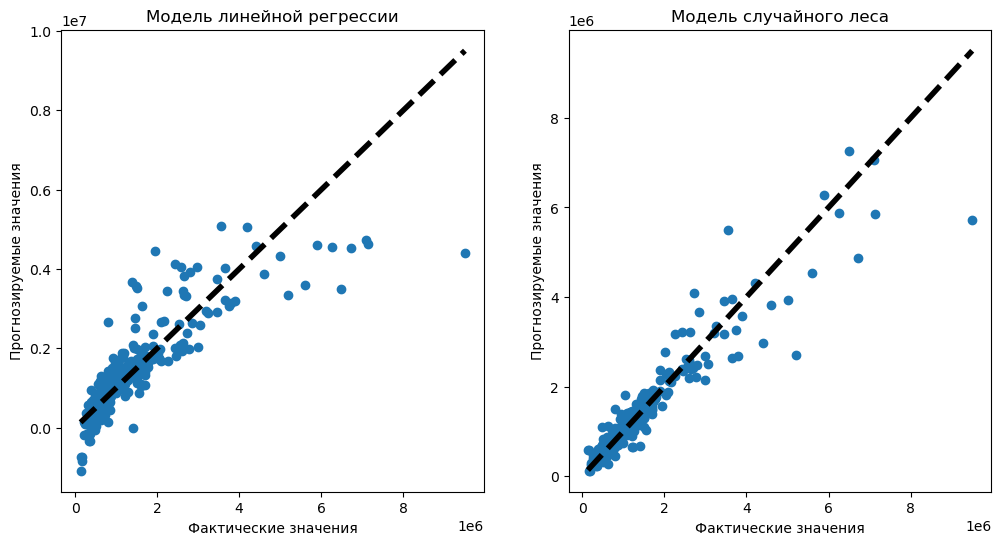

In [13]:
# список категориальных признаков
cat_features = ['name_car', 'type_transmition', 'type_of_drive', 'type_engine']

# создание объекта OneHotEncoder и преобразование категориальных признаков
enc = OneHotEncoder()
cat_enc = enc.fit_transform(df[cat_features])

# создание DataFrame из преобразованных признаков
cat_df = pd.DataFrame(cat_enc.toarray(), columns=enc.get_feature_names(cat_features))

# список числовых признаков
num_features = ['year', 'mileage', 'engine', 'power']

# создание объекта StandardScaler и стандартизация числовых признаков
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_features])

# объединение преобразованных признаков в один DataFrame
X = pd.concat([cat_df, pd.DataFrame(num_scaled, columns=num_features)], axis=1)

# целевая переменная
y = df['price']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создание объекта LinearRegression и обучение на обучающей выборке
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# прогнозирование на тестовой выборке и расчет метрик качества
y_pred_lin = lin_reg.predict(X_test)


mean_price = y_test.mean()
mae_lin = mean_absolute_error(y_test, y_pred_lin)
se_lin = mae_lin / mean_price * 100




print('Модель линейной регрессии:')
print('R2-score:', r2_score(y_test, y_pred_lin))
print('Стандартная ошибка в процентах для модели линейной регрессии:', se_lin)
print()

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# вычисление стандартной ошибки в процентах
mean_price = y_test.mean()
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
se_lin = mae_lin / mean_price * 100
se_rf = mae_rf / mean_price * 100

# вычисление стандартной ошибки в процентах
mean_price = y_test.mean()
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
se_lin = mae_lin / mean_price * 100
se_rf = mae_rf / mean_price * 100

print('Модель случайного леса:')
print('R2-score:', r2_score(y_test, y_pred_rf))
print('Стандартная ошибка в процентах для модели случайного леса:', se_rf)






# построение графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# график для линейной регрессии
ax[0].scatter(y_test, y_pred_lin)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[0].set_xlabel('Фактические значения')
ax[0].set_ylabel('Прогнозируемые значения')
ax[0].set_title('Модель линейной регрессии')

# график для случайного леса
ax[1].scatter(y_test, y_pred_rf)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax[1].set_xlabel('Фактические значения')
ax[1].set_ylabel('Прогнозируемые значения')
ax[1].set_title('Модель случайного леса')


# показывает, насколько хорошо линейная модель соответствует данным.

In [15]:
cat_df

,name_car_BMW,name_car_Daihatsu,name_car_Honda,name_car_Lexus,name_car_Mazda,name_car_Mitsubishi,name_car_Nissan,name_car_Subaru,name_car_Suzuki,type_transmition_АКПП,type_transmition_вариатор,type_transmition_механика,type_transmition_робот,type_of_drive_4WD,type_of_drive_задний,type_of_drive_передний,type_engine_бензин,type_engine_гибрид,type_engine_дизель
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9293,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
import pandas as pd

# чтение данных из файла

# применение onehot encoding к категориальным признакам
categorical_features = ['name_car', 'type_of_drive', 'type_transmition', 'type_engine']
data_encoded = pd.get_dummies(df, columns=categorical_features)

# применение биннинга к признаку mileage
data_encoded['mileage_binned'] = pd.cut(df['mileage'], bins=5, labels=[1, 2, 3, 4, 5])

# удаление исходного признака mileage
data_encoded.drop('mileage', axis=1, inplace=True)


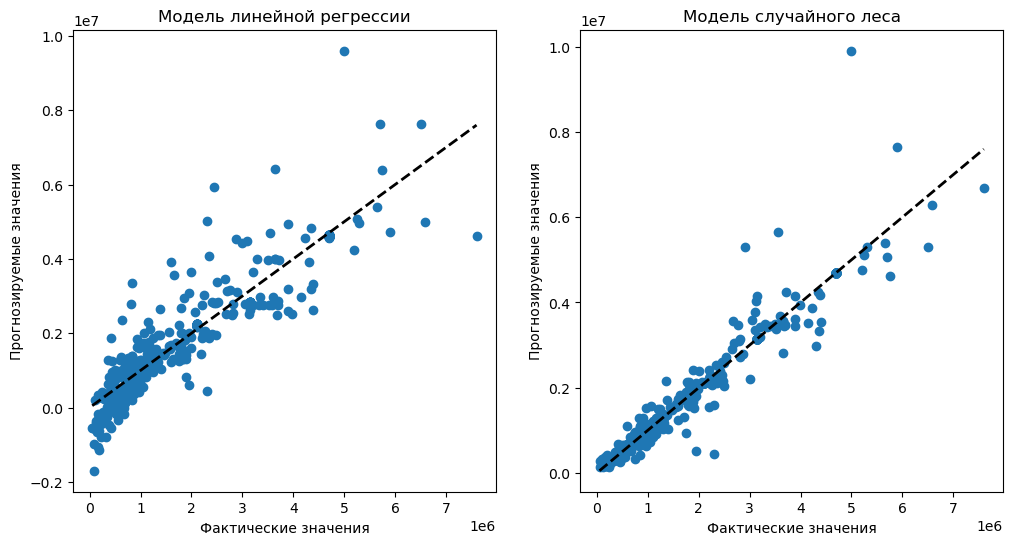

Стандартная ошибка в процентах для модели линейной регрессии: 17.168108895277914
Linear Regression: R^2 = 0.86

Random Forest: R^2 = 0.95
Стандартная ошибка в процентах для модели случайного леса: 5.228905000587761


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# чтение данных из файла

# применение onehot encoding к категориальным признакам
categorical_features = ['name_car', 'type_of_drive', 'type_transmition', 'type_engine']
data_encoded = pd.get_dummies(df, columns=categorical_features)

# применение биннинга к признаку mileage
data_encoded['mileage_binned'] = pd.cut(df['mileage'], bins=5, labels=[1, 2, 3, 4, 5])
# удаление исходного признака mileage
data_encoded.drop('mileage', axis=1, inplace=True)

# разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('price', axis=1), data_encoded['price'], test_size=0.2, random_state=42)

# обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# коэффициент детерминации
r2_lr = r2_score(y_test, y_pred_lr)

# случайная ошибка в процентах
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

# # построение графика предсказанных и реальных значений для модели линейной регрессии
# plt.scatter(y_test, y_pred_lr)
# plt.xlabel('Real Values')
# plt.ylabel('Predicted Values')
# plt.show()
# Scatter plot для линейной регрессии


# обучение модели случайного леса
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# коэффициент детерминации
r2_rf = r2_score(y_test, y_pred_rf)

# случайная ошибка в процентах
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# # построение графика предсказанных и реальных значений для модели случайного леса
# plt.scatter(y_test, y_pred_rf)
# plt.xlabel('Real Values')
# plt.ylabel('Predicted Values')
# plt.show()

# построение графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# график для линейной регрессии
ax[0].scatter(y_test, y_pred_lr)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0].set_xlabel('Фактические значения')
ax[0].set_ylabel('Прогнозируемые значения')
ax[0].set_title('Модель линейной регрессии')

# график для случайного леса
ax[1].scatter(y_test, y_pred_rf)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_xlabel('Фактические значения')
ax[1].set_ylabel('Прогнозируемые значения')
ax[1].set_title('Модель случайного леса')

plt.show()

mean_price = y_test.mean()
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
se_lin = mae_lin / mean_price * 100
se_rf = mae_rf / mean_price * 100

print('Стандартная ошибка в процентах для модели линейной регрессии:', se_lin)
print(f'Linear Regression: R^2 = {r2_lr:.2f}\n')
print(f'Random Forest: R^2 = {r2_rf:.2f}')
print('Стандартная ошибка в процентах для модели случайного леса:', se_rf)